## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter-006-001E-k-Nearest-Neighbor

In [1]:
from sklearn.neighbors import NearestNeighbors
import sklearn.neighbors as skn
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from random import sample
import matplotlib._color_data as mcd

In [2]:
ncnt1=3
ncnt2=5

In [3]:
np.random.seed(1968)
nrcnt=30
bdisplay=True

In [4]:
colors1 = np.array(list(sorted({name for name in mcd.CSS4_COLORS if "xkcd:" + name in mcd.XKCD_COLORS}, reverse=False)))
colors=np.random.choice(colors1,nrcnt)
if bdisplay:
    print(colors)

['gold' 'maroon' 'red' 'aqua' 'orangered' 'orangered' 'yellowgreen'
 'sienna' 'darkblue' 'silver' 'lavender' 'lightgreen' 'silver' 'red'
 'aqua' 'khaki' 'darkgreen' 'fuchsia' 'turquoise' 'goldenrod' 'red' 'navy'
 'khaki' 'ivory' 'fuchsia' 'magenta' 'aqua' 'olive' 'teal' 'red']


In [5]:
fileName = '../../Data/Postcodes004.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrial Machine Learning\book\GitHub\Upload\industrial-machine-learning\Data\Postcodes004.csv


In [6]:
datarawdf = pd.read_csv(fileFullName, header=0, encoding = 'latin_1')
print(datarawdf.shape)
print(datarawdf.columns)

(775795, 6)
Index(['Zipcode', 'Name', 'Region', 'Area', 'Longitude', 'Latitude'], dtype='object')


In [7]:
indices = np.random.randint(0,datarawdf.shape[0],nrcnt)
datadf=datarawdf.loc[indices]
if bdisplay:
    print(datadf[['Zipcode', 'Name', 'Latitude', 'Longitude']])

         Zipcode                                            Name   Latitude  \
337127   8696911                                        Yonghong  119.93313   
481562  10033465                                         Lujiapo  108.43600   
438826   9941964                                         Zhoucun  109.30200   
488201  10041747                                    Huangbanfang   99.74510   
272699   8265311  Changzhou Xiangrong Lizi Zaisheng Jiagongchang  119.84315   
305167   8507703                                 Liudaogou Sidui   96.75130   
312605   8517943                                        Wenjiaya  110.19275   
156629   7059527                                     Zhangjianao  110.33166   
8492     1552555                                          Zanjia  119.10653   
755523  11824899                                      Liushancun  120.02933   
399925   9897622                                      Liuluchong  110.50500   
310480   8514849                                    

In [8]:
Xdf = datadf[['Latitude', 'Longitude']].copy(deep=True)
Xdf.columns = ['latitude', 'longitude']
if bdisplay:
    print(Xdf.shape)
    print(Xdf.columns)

(30, 2)
Index(['latitude', 'longitude'], dtype='object')


In [9]:
nbrs1 = NearestNeighbors(n_neighbors=ncnt1,
                         algorithm='auto',
                         n_jobs=-1,
                         metric='l2'                         
                       ).fit(Xdf)

distances1, indices1 = nbrs1.kneighbors(Xdf)

n1=nbrs1.kneighbors_graph(Xdf).toarray()

In [10]:
if bdisplay:
    print('Indices')
    print('---------------')
    print(indices1)
    print('Distances')
    print('---------------')
    print(distances1)

    print('K-neighbors')
    print('---------------')
    print(n1)

Indices
---------------
[[ 0  4  8]
 [ 1 12  7]
 [ 2 12 10]
 [ 3 25 28]
 [ 4  0  8]
 [ 5 15 21]
 [ 6  7  1]
 [ 7  6  1]
 [ 8  0  4]
 [ 9 13  8]
 [10  2 12]
 [11 18 22]
 [12  1  2]
 [13  0  4]
 [14 23 19]
 [15 21 20]
 [16  1 12]
 [17 26 29]
 [18 11 22]
 [19 23  9]
 [20 21  6]
 [21 20 15]
 [22 18 11]
 [23 14 19]
 [24 18 22]
 [25 28  3]
 [26 17 29]
 [27 24 29]
 [28 25  3]
 [29 17 27]]
Distances
---------------
[[ 0.          0.26975911  0.9883449 ]
 [ 0.          1.4919948   2.17082189]
 [ 0.          2.14194166  2.7775387 ]
 [ 0.          2.40940884  2.61696577]
 [ 0.          0.26975911  1.08462716]
 [ 0.         11.23921596 12.27114179]
 [ 0.          1.61393903  3.19255284]
 [ 0.          1.61393903  2.17082189]
 [ 0.          0.9883449   1.08462716]
 [ 0.          2.14582439  2.63832558]
 [ 0.          2.7775387   4.86014973]
 [ 0.          1.03891951  2.03361496]
 [ 0.          1.4919948   2.14194166]
 [ 0.          1.02924692  1.29635274]
 [ 0.          2.48883263  4.07817963]
 [ 0

In [11]:
X = np.array(Xdf['latitude']).reshape(1,-1).T
if bdisplay:
    print(X.shape)

(30, 1)


In [12]:
Y = np.array(Xdf['longitude']).reshape(1,-1).T
if bdisplay:
    print(Y.shape)

(30, 1)


In [13]:
xmin=np.floor(min(X))
xmax=np.ceil(max(X))
ymin=np.floor(min(Y))
ymax=np.ceil(max(Y))
print(xmin,xmax,ymin,ymax)

[96.] [127.] [22.] [44.]


In [14]:
if n1.shape[0] > colors.shape[0]:
    step=int(np.ceil(n1.shape[0]/colors.shape[0]))
else:
    step=1

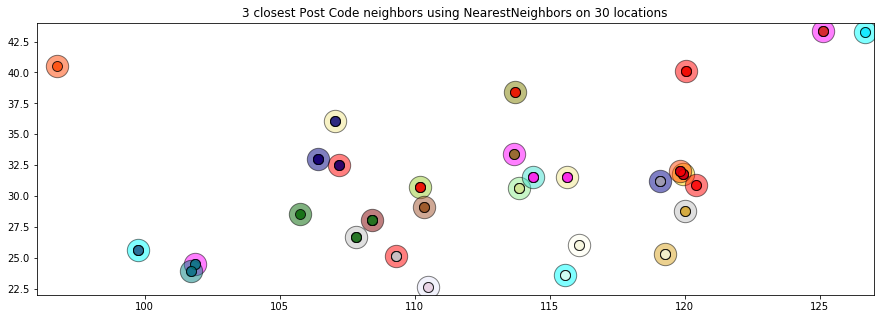

In [15]:
fig1=plt.figure(figsize=(15, 5))
titlename = '%d closest Post Code neighbors using NearestNeighbors on %d locations' % (ncnt1, nrcnt)
plt.title(titlename, loc='center')

k=-1
for p in range(0,n1.shape[0],step):  
    l=n1[p]
    k+=1
    c=colors[k]
    plt.scatter(X[p], 
                Y[p], 
                marker='o', 
                s=500,
                alpha=0.5, 
                edgecolors='k',
                antialiased=True,
                c=c
               )
    for i in range(l.shape[0]):
        if l[i] == 1:
            plt.scatter(X[i], 
                        Y[i], 
                        marker='o', 
                        s=100, 
                        alpha=0.8, 
                        edgecolors='k',
                        antialiased=True,
                        c=c
                       )
            plt.plot(X[p],X[i], 
                     Y[p],Y[i],
                     c=c,
                     alpha=1.0,
                     antialiased=True,
                     linestyle='--',
                     linewidth=3
                    )

plt.axis([xmin,xmax,ymin,ymax])
#plt.autoscale(enable=True, axis='x', tight=False)
plt.show()

In [16]:
nbrs2 = NearestNeighbors(n_neighbors=ncnt2, 
                        algorithm='auto',
                         n_jobs=-1,
                         metric='l2'            
                       ).fit(X)

distances2, indices2 = nbrs2.kneighbors(X)

n2=nbrs2.kneighbors_graph(X).toarray()

In [17]:
if bdisplay:
    print('Indices')
    print('---------------')
    print(indices2)
    print('Distances')
    print('---------------')
    print(distances2)

    print('K-neighbors')
    print('---------------')
    print(n2)

Indices
---------------
[[ 0  4  9 29 13]
 [ 1 12  2 20 15]
 [ 2  1  6  7 10]
 [ 3 28 25  5 16]
 [ 4  0  9 29 19]
 [ 5  3 28 25 16]
 [ 6  7 10  2  1]
 [ 7  6 10  2  1]
 [ 8 19  4  0  9]
 [ 9 29  0  4 13]
 [10  7  6  2  1]
 [11 27 24 18 14]
 [12 20  1 15 21]
 [13 29  9  0  4]
 [14 22 23 18 11]
 [15 20 21 12 16]
 [16 21 15 20 12]
 [17 26 13 29  9]
 [18 11 27 24 14]
 [19  8  4  0  9]
 [20 15 12 21  1]
 [21 15 16 20 12]
 [22 14 23 18 11]
 [23 22 14 18 11]
 [24 27 11 18 14]
 [25 28  3 16 21]
 [26 17 13 29  9]
 [27 24 11 18 14]
 [28 25  3 16 21]
 [29  9  0  4 13]]
Distances
---------------
[[0.      0.08998 0.0962  0.12483 0.49139]
 [0.      0.612   0.866   1.21981 1.377  ]
 [0.      0.866   0.89075 1.02966 1.203  ]
 [0.      1.9719  2.1299  2.9938  5.9949 ]
 [0.      0.08998 0.18618 0.21481 0.56201]
 [0.      2.9938  4.9657  5.1237  8.9887 ]
 [0.      0.13891 0.31225 0.89075 1.75675]
 [0.      0.13891 0.17334 1.02966 1.89566]
 [0.      0.17461 0.73662 0.8266  0.9228 ]
 [0.      0.02863 0.09

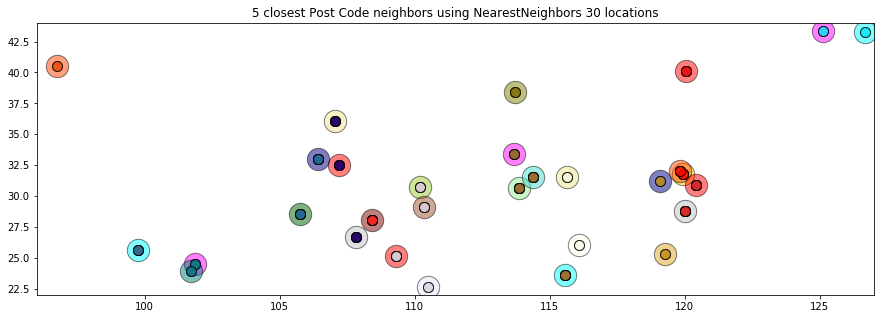

In [18]:
fig2=plt.figure(figsize=(15, 5))
titlename = '%d closest Post Code neighbors using NearestNeighbors %d locations' % (ncnt2, nrcnt)
plt.title(titlename)
k=-1
for p in range(0,n2.shape[0],step): 
    l=n2[p]
    k+=1
    c=colors[k]
    plt.scatter(X[p], 
                Y[p], 
                marker='o', 
                s=500,
                alpha=0.5, 
                edgecolors='k',
                antialiased=True,
                c=c
               )
    for i in range(l.shape[0]):
        if l[i] == 1:
            plt.scatter(X[i], 
                        Y[i], 
                        marker='o', 
                        s=100, 
                        alpha=0.8, 
                        edgecolors='k',
                        antialiased=True,
                        c=c
                       )
            plt.plot(X[p],X[i], 
                     Y[p],Y[i],
                     c='k',
                     alpha=0.6,
                     antialiased=True,
                     linestyle='-',
                     linewidth=100
                    )

plt.axis([xmin,xmax,ymin,ymax])
#plt.autoscale(enable=True, axis='x', tight=False)
plt.show()

In [19]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06'])
print(imagepath)

if not os.path.exists(imagepath):
    os.makedirs(imagepath)
    
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-Example-001E-01.jpg'])
fig1.savefig(imagename, bbox_inches='tight')     
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-Example-001E-02.jpg'])
fig2.savefig(imagename, bbox_inches='tight') 

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrial Machine Learning\book\GitHub\Upload\industrial-machine-learning\Results\Chapter 06


## Done

In [20]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-10-19 19:46:04.088041
